# Tajo Test

In [124]:
import seaborn as sns
import requests as r
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [125]:
data = r.get('https://epistat.sciensano.be/Data/COVID19BE_tests.json').json()

In [126]:
df = pd.DataFrame(data)
df.info
df.describe(include='all') 

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
count,4776,4378,4378,4776.000000,4776.000000
unique,398,11,3,NaN,NaN
top,2020-12-15,VlaamsBrabant,Wallonia,NaN,NaN
freq,12,398,1990,NaN,NaN
mean,NaN,NaN,NaN,2366.728853,207.716290
std,NaN,NaN,NaN,2334.314553,373.843595
min,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,672.750000,23.000000
50%,NaN,NaN,NaN,1533.000000,84.000000
75%,NaN,NaN,NaN,3338.250000,240.000000


In [149]:
df = df[~df.PROVINCE.isnull()]

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   DATE              0 non-null      object
 1   PROVINCE          0 non-null      object
 2   REGION            0 non-null      object
 3   TESTS_ALL         0 non-null      int64 
 4   TESTS_ALL_POS     0 non-null      int64 
 5   TESTS_ALL_CUMSUM  0 non-null      int64 
 6   DATE_PARSED       0 non-null      object
dtypes: int64(3), object(4)
memory usage: 0.0+ bytes


In [145]:
df.sample(3)

ValueError: a must be greater than 0 unless no samples are taken

In [146]:
df['TESTS_ALL_CUMSUM'] = df.groupby('PROVINCE')['TESTS_ALL'].transform(pd.Series.cumsum)
df['DATE_PARSED'] = df.DATE.map(lambda s: datetime.strptime(s, '%Y-%m-%d'))

In [147]:
df_month = df[df.DATE_PARSED.map(lambda d: d.day == 1)]
df_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Empty DataFrame

In [148]:
df_month.sample(2)

ValueError: a must be greater than 0 unless no samples are taken

<AxesSubplot:xlabel='DATE', ylabel='TESTS_ALL_CUMSUM'>

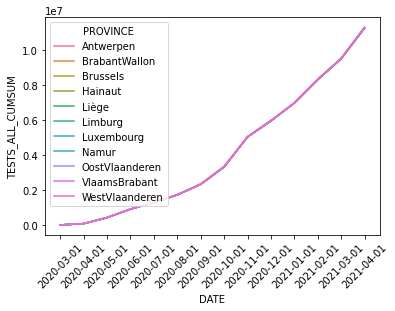

In [135]:
plt.xticks(rotation=45)
sns.lineplot(data=df_month, x="DATE", y="TESTS_ALL_CUMSUM", hue='PROVINCE')